### Empirical Distribution Function (EDF)

We can approximate $F$ with $\hat{F}_n$ with $n$ datapoints $\{x\}^n_{i=1}$, since $F(x_0) = P[X<x_0]$ we approximate,

$$\hat{F}_n(x_0) = \frac{\text{# obs below $x_0$}}{n} = \frac{\sum_i I(x_i < x_0)}{n} = \frac{\sum_i Y_i}{n}$$

This is a nonparametric technique to use existing data to derive a cdf. As $n$ grows the $\hat{F}_n$ converges to $F$.

Properties:
- Let $Y_i = I(X_i < x_0)$ is a bernoulli r.v. with $p$ equal to $F(x_0)$ i.e. $Y_i \sim BER(F(x_0))$. So we also have,
$$E[Y_i] = F(x_0)$$
$$V[Y_i] = F(x_0)(1-F(x_0))$$
- Now consider $\hat{F}_n(x_0) = n^{-1} \sum_i Y_i$,
$$E[\hat{F}_n(x_0)] = E(\frac{\sum_i I(x_i < x_0)}{n}) = F(x_0)$$
$$V[\hat{F}_n(x_0)] = V(\frac{\sum_i I(x_i < x_0)}{n}) = \frac{F(x_0)(1-F(x_0))}{n}$$
- Thus $\hat{F}_n(x_0)$ is consistent and unbiased estimator.
- Thus we have asympotic normality by the CLT,

$$\sqrt{n}(\hat{F}_n(x_0) - F(x_0)) \sim_d N(0, F(x_0)(1-F(x_0))$$

- Also note that the derivative of the EDF is,

$$\frac{d\hat{F}_n(x_0)}{x_0} = \frac{1}{n} I(x_0 \in \{x_1,x_2...x_n\})$$

Since it is a step function, the change is $1/n$ when $x_0$ is a value found in the sample and $0$ elsewhere.



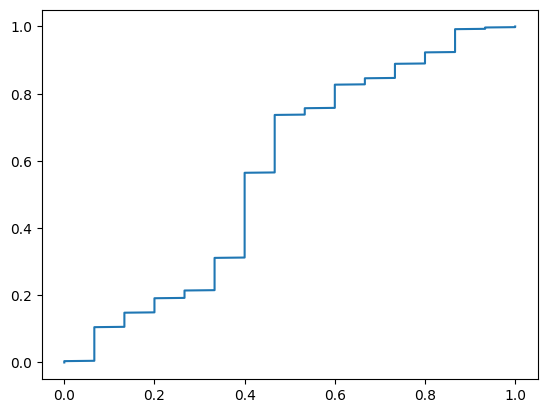

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def EDF(X, x_0):
    return np.sum(X < x_0) / X.shape[0]

X = np.random.uniform(0, 1, 15)
EDF(X, 0.5)

x = np.linspace(0,1,1000)
CDF_x = np.array([EDF(X, x_0) for x_0 in x])

plt.plot(CDF_x,x)
plt.show()

### Statistical Functionals

A functional is a function of a function, $T:\mathbb{F} \rightarrow \mathbb{R}$, where $\mathbb{F}$ is a set of functions. A statistical functional is a mapping from sets of CDFs to real numbers. Given $X \sim F$, the mean is a functional

- Mean: $E[X] = T_{\text{mean}}(F) = \int x dF(x)$
- Median: $M[X] = T_{\text{median}}(F) = F^{-1}(0.5)$

Note that any moment where the order of the data does not matter is a functional ($x_{(1)}$, or the first value, if not a functional). These functionals are useful because describe key population moments and can be used to describe the population. Secondly, they can be used to construct estimators for these objects using an estimate of $F$, such as $\hat{F}$. These are estimators where we use the same functional but plug in the cdf estimated from the sample,

- Estimator for Mean: $T_{\text{mean}}(\hat{F}) = \int x d\hat{F}(x) = \sum_i X_i (1/n) = \bar{X}_n$

A linear functional is $T_w(F) = \int w(x) dF(x)$. They have some properties,

$$T_w(F) = (1/n) \sum_i g(X_i)$$

For another distribution $G$,

$$T_w(G) - T_w(F) = \int L_F(x) dG(x) = \int w(x) - T_w(F) dG(x)$$

where $L_F(x)$ is the influence function of $T_w$ and,

$$ \sqrt{n}(T_w(\hat{F})-T_w(F)) \sim_d N(0, \int L_F(x)^2 dF(x))$$

and a consistent estimator of the variance is $(1/n) \sum_i L^2_F(X_i)$.

### Influence Functions

Influence functions tell us how a particular data point influence the sample estimator of a parameter. We find that by increasing its "sample weight" by a tiny amount and observing the change in the sample estimator.

Given some distribution $X \sim F$, the influence function of estiamtor $\hat{\theta}(F)$ is defined as,

$$IF_{\hat{\theta}}(x) = \lim_{\epsilon \rightarrow 0} \frac{\hat{\theta}(F_{\epsilon}(x))-\hat{\theta}(F(x))}{\epsilon}$$

where $F_{\epsilon}(x) = (1-\epsilon)F + \epsilon \delta_x$, and $\delta_x$ is a distribution with all mass at $x$.

- $F_{\epsilon}(x)$ is the contaminated distribution, which using $F$ oversamples $x$ with probability $\epsilon$.
- $IF_{\hat{\theta}}(x)$ measures the influence of point $x$ on $\hat{\theta}$. Thus $IF_{\hat{\theta}}(x)$ tells us exactly how much would $\hat{\theta}(x)$ change we began to oversample $x$ an infinitsmal amount.
- Oversampling some $x$ will increase $\hat{\theta}(F)$ while oversampling other $x$ will decrease it. The magnitudes may also vary. But on average, we should see no net change i.e. $E_F[IF_{\hat{\theta}}(x)]=0$.
- However, if there are some $x$ for which $IF_{\hat{\theta}}(x)$ is very large, while for some $x$ we see very small $IF_{\hat{\theta}}(x)$, then the $V_F[IF_{\hat{\theta}}(x)]$ is large. This means that the estimator is very sensitive to certain datapoints, and if we were to sample again, if any of those sensitive datapoints were missing, the value of the estimator would change. Thus $IF_{\hat{\theta}}(x)$ helps generate standard errors for $\hat{\theta}(F)$. If $N$ is the sample size,

$$V_{\hat{\theta}} = \frac{E_F[IF_{\hat{\theta}}(x)^2]}{N}$$

- So $V_{\hat{\theta}}$ falls as the sample size increases. But it also increases as the variance of the influence functions. In other words, if there are many outliers which influence the estimate then the estiamator would have high variance.

### More details

Let $\vec{z} = (z_i)_{i=0}^n \sim F$ and $\hat{\theta}(\vec{z})$ be an estimator. We define the contaminated distribution of instance $x$ as,

$$F_\epsilon(x) = (1-\epsilon)F + \epsilon \delta_{x}$$

where $\delta_{x}$ is a probability measure which is 1 to when $Z = x$ and 0 elsewhere. Thus if $\epsilon=0.5$, then $F_\epsilon(x)$ represents a distribution where we have 50% chance of drawing $x$ and 50% chance of not drawing $x$. Thus this distribution is just the old distribution but with oversampling of a particular datapoint. The influence that $x$ has on the estimator $\hat{\theta}(\vec{z})$, is the change in $\hat{\theta}(\vec{z})$ when we increase the probability of drawing $x$ by a infinitsmal amount. Define the "influence function" as the Gateaux Derivative,

$$\Psi_{F, \hat{\theta}}(x) = \lim_{\epsilon \rightarrow 0} \frac{\theta(F_\epsilon(x)) - \theta(F)}{\epsilon}$$

Note: The Gateaux derivative is the generalization of concept of derivatie to infinite dimensional spaces. We can speak of derivatives of multi-valued functions. Also we draw $\theta(F_\epsilon)$ and $\theta(F)$ from distributions and not the sample $z$ itself. So the influence function is defined on population moments and not sample moments.

We can always use Taylor series expansions to interpret the sample estimator as being equal to the true value of the parameter with $n$ equally weighted disturbances that push and pull the sample estimator away from the true value. The average value of the influence of all data points in the sample tell you how far the estimator is from the true value.

$$\hat{\theta}(z) = \theta_0 + n^{-1} \sum_i \Psi_{F, \hat{\theta}}(z_i) + o_p(1)$$

We know that $E[\Psi_{F, \hat{\theta}}(x)] = 0$ and so the second term tends to 0 as the sample expands. Further, from the central limit theorem we also know that sample averages are asymptotically normal. Thus,

$$\sqrt{n}(\hat{\theta}(z)-\theta_0) \rightarrow^{d} N(0, E[\sum_i \Psi_{F, \hat{\theta}}(z_i)'\Psi_{F, \hat{\theta}}(z_i)])$$

Thus if we know the influence function we also know the asymptotic variance of the estimator. Also if $\theta(\theta_1(x),\theta_2(x)...\theta_k(x))$ then we can use chain rule to find,

$$ \Psi_{\theta}(x) = \sum_{i} \frac{d\hat{\theta}}{d\theta_1} \Psi_{\theta_1}(x) $$




### Example: Population Mean

Let the data be $(z_i)_{i=0}^{n}$ and an instance be $\tilde{z_i}$. Let the estimator be,

$$\hat{\theta}(F) = E[Z]$$

Then the contaminated distribution for instance $\tilde{z_i}$ is,

$$F_{\epsilon}(\tilde{z_i}) = (1-\epsilon)F + \epsilon \delta_{\tilde{z_i}}$$

and using this distribution we can compute the new estimator with oversampling,

$$\theta(F_\epsilon(\tilde{z_i})) = E_{F_\epsilon(\tilde{z_i})}[Z]$$
$$ = (1-\epsilon) E_{F}[Z] + \epsilon E_{\delta_{\tilde{z_i}}}[Z]$$
$$ = (1-\epsilon) E_{F}[Z] + \epsilon \tilde{z_i}$$

so the influence function is,

$$\Psi_{F, \hat{\theta}}(\tilde{z_i}) = \lim_{\epsilon \rightarrow 0} \frac{(1-\epsilon) E_{F}[Z] + \epsilon \tilde{z_i}}{\epsilon}$$
$$ = \lim_{\epsilon \rightarrow 0} \frac{-\epsilon E_{F}[Z] + \epsilon \tilde{z_i}}{\epsilon}$$
$$ = \tilde{z_i} - E_{F}[Z]$$

So the influence of $\tilde{z_i}$ on $\hat{\theta}(F)$ is how far it is from the mean $E_F[z_i]$.

Note that,

$$E_F[\tilde{z_i} - E_{F}[Z]]=E_{F}[Z]-E_{F}[Z]=0 $$

Now if were to focus on









### Influence Functions and Nuisance Parameters

We want to estimate $\beta_0 \in \mathbb{R}^q$ in the presense of nuisance $\eta_0  \in \mathbb{R}^r$ using data,

$$X_1,X_2...X_n \sim p(x;\beta_0,\eta_0)$$

An estimator $\hat{\beta}_n$ is asymptotically linear with influence function $\Psi(X_i)$ iff

$$\sqrt{n}(\hat{\beta}_n - \beta_0) = n^{-1/2} \sum_i \Psi(X_i) + o_{P}(1)$$

where $E[\Psi(X_i)] = 0$, and $E[\Psi(X_i)\Psi(X_i)']$ exists and is finite. There are usually many such asymptotically linear estimators for $\beta_0$ each with a unique influence functions. Score functions are the derivatives of the log of the joint density w.r.t the parameters,

$$S^T_{\beta}(X;\beta_0,\eta_0) = \frac{\log p(x;\beta_0,\eta_0)}{\beta_0}$$
$$S^T_{\eta}(X;\beta_0,\eta_0) = \frac{\log p(x;\beta_0,\eta_0)}{\eta_0}$$

Theorem 1: If $\hat{\beta}_n$ is a regular asymptotic linear (RAL) estimator, then,

$$E[\Psi(X_i)S^T_{\beta}(X;\beta_0,\eta_0)] = I_{qxq}$$
$$E[\Psi(X_i)S^T_{\eta}(X;\beta_0,\eta_0)] = 0_{qxr}$$

Theorem 2: Let $\Psi(X_i)$ be an influence function, and for each $\beta$ we have $\hat{\eta}(\beta)$ such that, $\sqrt{n}|\eta^(\beta)-\eta_0|$ is bounded in probability, then define $m(X;\beta,\eta) = \Psi(X_i) - E_{X \sim p}[\Psi(X_i)]$, and find $\beta$ that solves,

$$\sum_i m(X;\beta,\hat{\eta}(\beta)) = 0$$

Then that $\hat{\beta}$ would be a RAL with influence function $\hat{\eta}(\beta)$. RAL estimators are consistent (asymptotically unbiased), but may not be efficient.

